In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/HR_attrition_rate.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting Attrition

In [7]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


With the above we can see last 5 rows of our dataset, by which we can see that which factor is affecting Attrition.

In [8]:
df.shape

(14999, 10)

By the above function we can see that we are having 14999 rows and 10 columns in our dataset.

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [10]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

Here we can see that we have 3 types of data that is interger and float and object let's see if we need to change object type to integer.

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

We can see that we are not having any null values in our dataset which is beneficial for us and we do not have to treat null values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<Axes: >

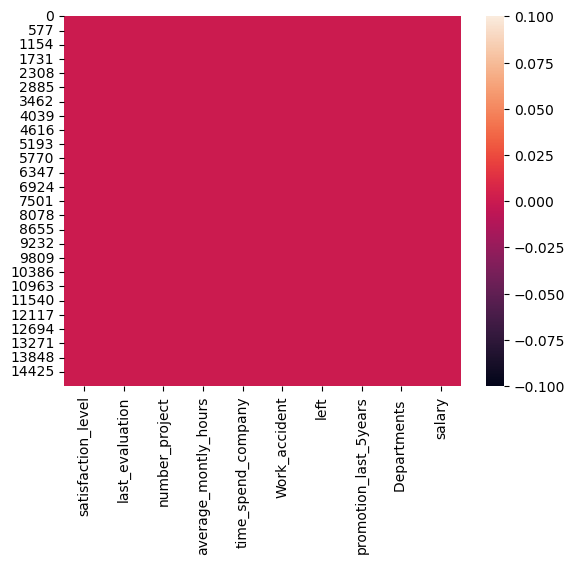

In [14]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers and skweness.

In [15]:
df.nunique().to_frame("Unique values")

,Unique values
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
left,2
promotion_last_5years,2
Departments,10
salary,3


We can see we are having maximum unique values, which will be helpful in analysing data.

In [16]:
df.duplicated().sum()

3008

We can see we are having 3008 duplicated in our data, let's drop them for better implementation.

In [18]:
df = df.drop_duplicates()

In [17]:
df.describe()  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Following is the complete numeric analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above data.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

By analysing the data we can see that there is difference between 75th percentile and maximum value of average_montly_hours	time_spend_company this means we are having outliers in our dataset, ans will treat it further.

In [19]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


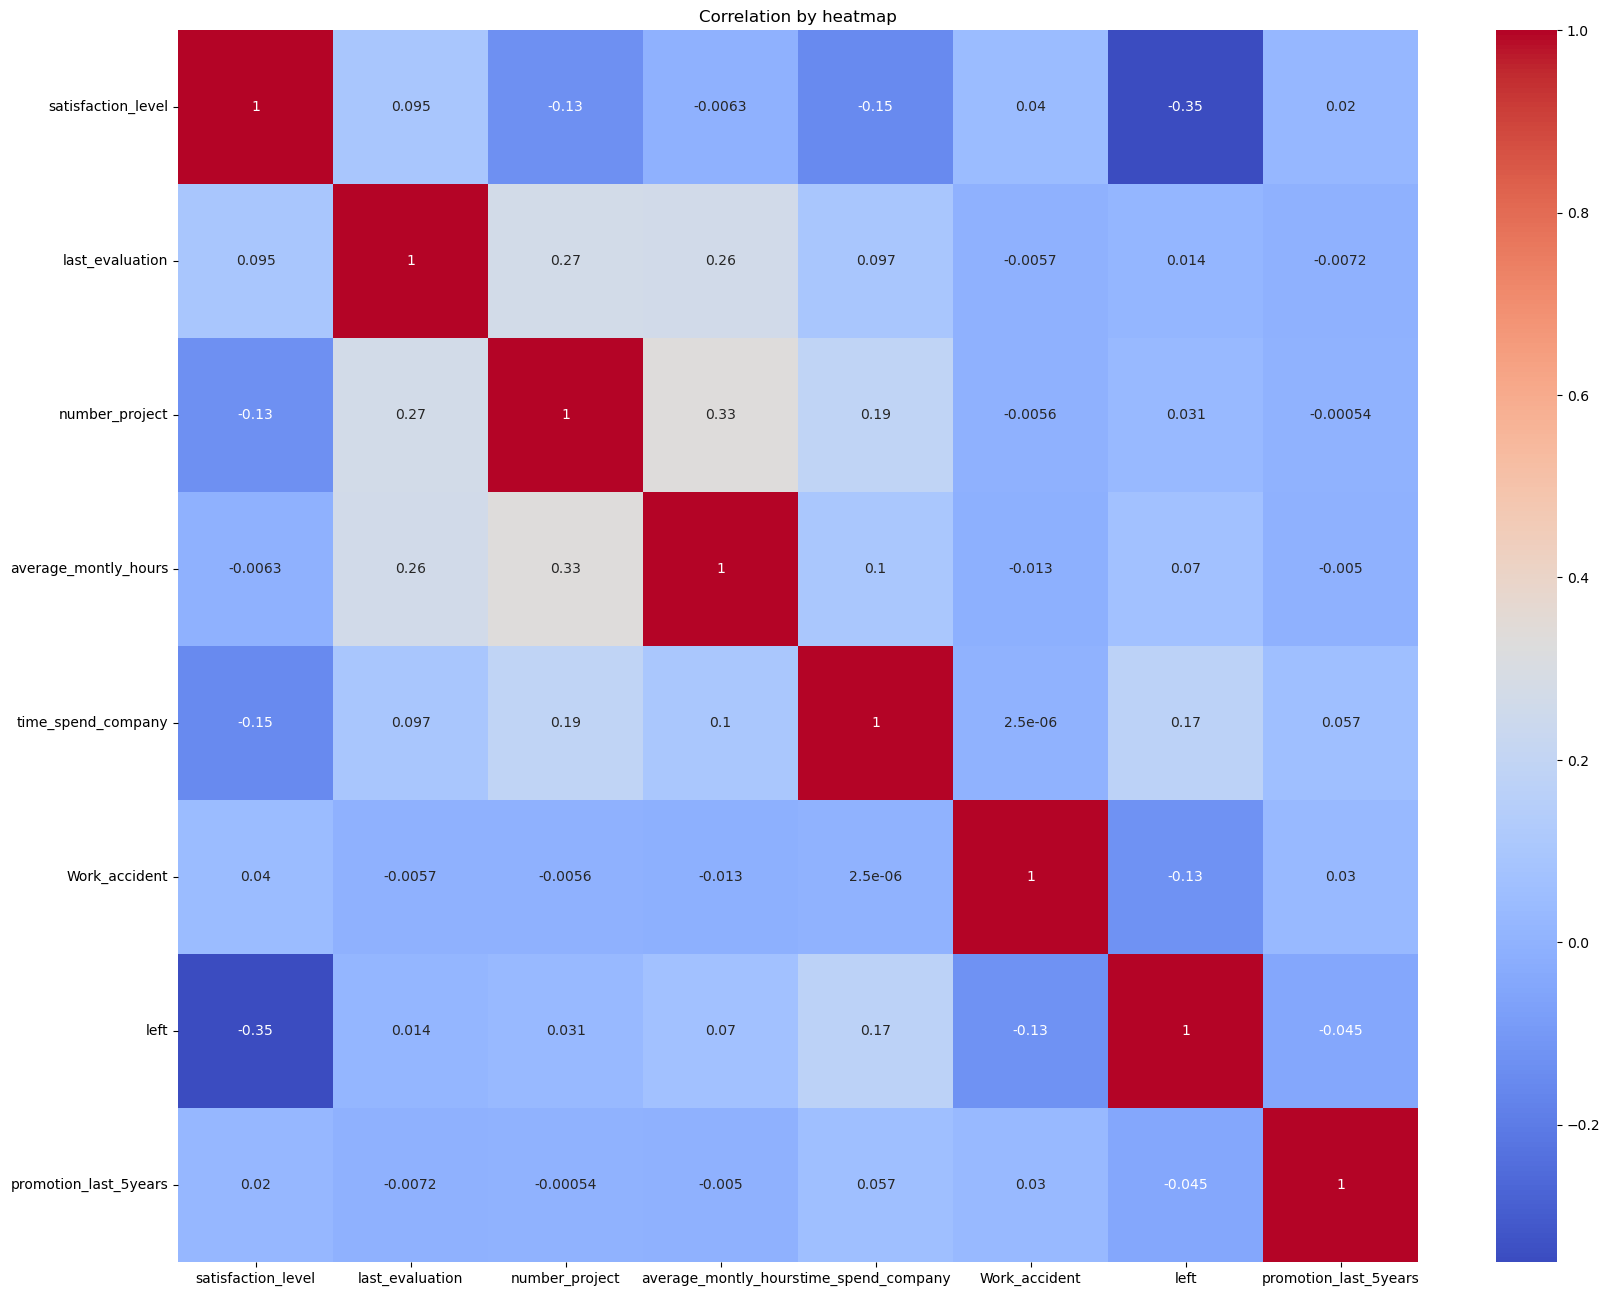

In [20]:
# As it is difficult to identify correlation with the help of above code let's check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can see that we are not having high correlation bvetween two columns this menas means we'll not face multicollinearity issue and there is no need to treat them.

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'satisfaction_level'),
  Text(2, 0, 'last_evaluation'),
  Text(3, 0, 'number_project'),
  Text(4, 0, 'average_montly_hours'),
  Text(5, 0, 'time_spend_company'),
  Text(6, 0, 'Work_accident'),
  Text(7, 0, 'left'),
  Text(8, 0, 'promotion_last_5years')])

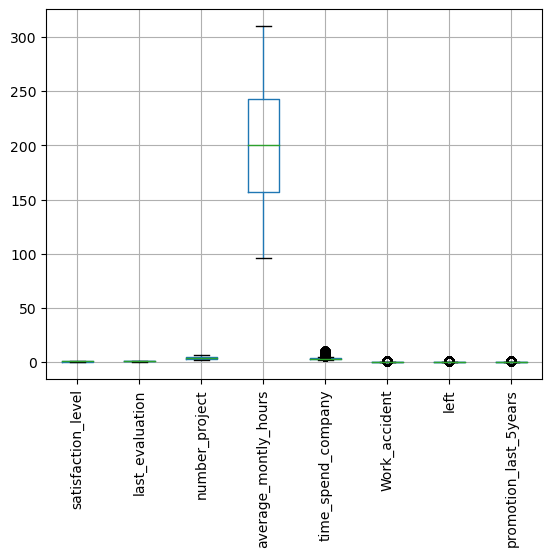

In [23]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks
plt.xticks(rotation=90)

In [24]:
#Let's find outlier with Zscore method
outliers=df[['average_montly_hours', 'time_spend_company']]
z=np.abs(zscore(outliers))
z

,average_montly_hours,time_spend_company
0,0.892208,0.274291
1,1.262709,1.981036
2,1.467939,0.477485
3,0.462311,1.229261
4,0.851162,0.274291
...,...,...
11995,1.201140,4.988139
11996,1.344801,4.988139
11997,0.317563,4.988139
11998,0.584363,4.988139


In [25]:
np.where(z>3)

(array([10998, 10999, 11000, 11001, 11002, 11069, 11070, 11071, 11072,
        11073, 11074, 11115, 11116, 11117, 11118, 11119, 11120, 11184,
        11185, 11186, 11187, 11188, 11189, 11190, 11205, 11206, 11207,
        11208, 11209, 11217, 11218, 11220, 11221, 11222, 11223, 11249,
        11250, 11251, 11252, 11253, 11254, 11255, 11270, 11271, 11272,
        11273, 11274, 11282, 11283, 11285, 11286, 11287, 11288, 11337,
        11338, 11339, 11340, 11341, 11342, 11496, 11497, 11498, 11499,
        11500, 11502, 11503, 11504, 11505, 11506, 11507, 11510, 11511,
        11517, 11518, 11519, 11520, 11521, 11522, 11548, 11549, 11550,
        11551, 11552, 11554, 11555, 11556, 11557, 11558, 11559, 11562,
        11563, 11569, 11570, 11571, 11572, 11573, 11574, 11596, 11597,
        11598, 11599, 11600, 11602, 11603, 11604, 11605, 11606, 11607,
        11610, 11611, 11617, 11618, 11619, 11620, 11621, 11622, 11624,
        11625, 11626, 11627, 11628, 11629, 11651, 11652, 11653, 11654,
      

In [26]:
df1=df[(z<3).all(axis=1)]

In [27]:
df1.shape

(11803, 10)

We can see that we have successfully removed outliers let's do further analysis of model.

In [28]:
#let's check skewness of our data
df1.skew()

satisfaction_level      -0.539144
last_evaluation         -0.029756
number_project           0.329085
average_montly_hours     0.027665
time_spend_company       0.978468
Work_accident            1.930689
left                     1.769714
promotion_last_5years    7.691063
dtype: float64

we can see that some of our columns are skewed which are Work_accident, promotion_last_5years let's treat them accordingly.

In [29]:
#first will use cuberoot method to remove skewness from these columns
df1['Work_accident']=np.cbrt(df1['Work_accident'])
df1['promotion_last_5years']=np.cbrt(df1['promotion_last_5years'])


In [30]:
df1.skew()

satisfaction_level      -0.539144
last_evaluation         -0.029756
number_project           0.329085
average_montly_hours     0.027665
time_spend_company       0.978468
Work_accident            1.930689
left                     1.769714
promotion_last_5years    7.691063
dtype: float64

We can see skweness has not been removed via above method let's try square root method.

In [31]:
df1['Work_accident']=np.square(df1['Work_accident'])
df1['promotion_last_5years']=np.square(df1['promotion_last_5years'])

In [32]:
df1.skew()

satisfaction_level      -0.539144
last_evaluation         -0.029756
number_project           0.329085
average_montly_hours     0.027665
time_spend_company       0.978468
Work_accident            1.930689
left                     1.769714
promotion_last_5years    7.691063
dtype: float64

Let's remove promostion last year as it is not getting treated via any methos we have also checked for log method previously.

In [34]:
df1.drop(columns=['promotion_last_5years'], inplace=True)

In [42]:
df1['satisfaction_level'] = df1['satisfaction_level'].round().astype(int)
df1['last_evaluation'] = df1['last_evaluation'].round().astype(int)
df1['Work_accident'] = df1['Work_accident'].round().astype(int)

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [46]:
df1['salary'] = label_encoder.fit_transform(df1['salary'])

In [52]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'salary']
target = 'left'

In [53]:
x = df1[features]
y = df1[target]

In [54]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (11803, 7)
dimension of dependent variable: (11803,)


We can see that we are having same number of rows that is 11803 rows and 7 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [56]:
#let's find best random state with maximum r2 score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("maximum r2 score is ", maxAccu,"on Randome_state",maxRS)        

maximum r2 score is  0.2541035468925825 on Randome_state 0


In [57]:
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred_RFR=rfr.predict (x_test)
    pred_train=rfr.predict(x_train)
    print ('R2 score:',r2_score(y_test,pred_RFR))
    print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
    print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
    print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
    print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.7750636698898179
R2 score on training Data: 95.01607618148104
Mean Absolute Error: 0.050508055485886605
Mean Squared Error: 0.031191725459784537
Root Mean Squared Error: 0.17661179309373579


In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.6714389702944779
R2 score on training Data: 97.02005383218238
Mean Absolute Error: 0.049436532591008726
Mean Squared Error: 0.04556127251804422
Root Mean Squared Error: 0.21345086675402425


In [59]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.7270480300447988
R2 score on training Data: 97.02005383218238
Mean Absolute Error: 0.05162093705033552
Mean Squared Error: 0.03785001251856292
Root Mean Squared Error: 0.19455079675643305


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.7664682394422614
R2 score on training Data: 80.06164451284502
Mean Absolute Error: 0.08389617266656853
Mean Squared Error: 0.032383646331782076
Root Mean Squared Error: 0.17995456741017182


In [61]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.21249572551686335
R2 score on training Data: 24.056169511252246
Mean Absolute Error: 0.22783111263401737
Mean Squared Error: 0.10920253351716303
Root Mean Squared Error: 0.33045806620078594


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[-5.38108108  0.          0.          0.          0.        ]
-1.0762162162162165
Difference between R2 score and cross validation score is : 108.29306059191613


In [65]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[-5.38108108  0.          0.          0.          0.        ]
-1.0762162162162165
Difference between R2 score and cross validation score is : 108.39668529151147


In [66]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[-5.38108108  0.          0.          0.          0.        ]
-1.0762162162162165
Difference between R2 score and cross validation score is : 108.34866965166646


In [67]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[-5.38108108  0.          0.          0.          0.        ]
-1.0762162162162165
Difference between R2 score and cross validation score is : 108.38808986106392


In [68]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[-5.38108108  0.          0.          0.          0.        ]
-1.0762162162162165
Difference between R2 score and cross validation score is : 107.83411734713852


With the above cross valiadation we can see that decision tree regressor is working  best with our data so let's select this model and perform hyperparameter tunning

In [69]:
#Lets test our data by grid search
from sklearn.model_selection import RandomizedSearchCV

In [71]:
param={'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}
Rscv=RandomizedSearchCV(DecisionTreeRegressor(),param,cv=5)
Rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [72]:
Rscv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'friedman_mse'}

In [73]:
Model=ExtraTreesRegressor(min_samples_split= 2,min_samples_leaf= 2,max_depth= 10,criterion= 'friedman_mse')

In [74]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8089506826417932
Mean Absolute Error: 0.05550985070551624
Mean Squared Error: 0.02649264284429919
Root Mean Squared Error: 0.16276560706825993


We can see that at the final stage ur model is giving r2 score of 80  which can be considered as good accuracy score.

Now let's save our model by pickle method



In [76]:
import pickle
filename='Hr_attrition.pkl'
pickle.dump(Model,open(filename,'wb'))

We've already saved our work with above code let's reopen the model and check r2 score

In [77]:
Load_model=pickle.load(open('Hr_attrition.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

80.89506826417932


We can see our accuracy score above, let's also check prediction of our model manually.

In [79]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [80]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540
Predicted,0.002322,0.990298,0.005097,0.007761,0.98013,0.000686,0.18249,0.886235,0.96864,0.004072,...,0.944493,0.022116,0.247232,0.042312,0.005414,0.995451,0.639993,0.001766,0.004486,0.001211
Original,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,1.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


# Thank you